# Stanford CS-229 Spring 2022
### Accompanying implementation by Sebastian Reddy

## Linear Regression

Data is sampled from underlying distribution $ f(\vec{x}) $ but with some noise $ \epsilon $ added. This gives the data as $$ \vec{y}^{(i)} = f(\vec{x}^{(i)}) + \epsilon^{(i)}$$ for $ i = 1,...,n $ for $ n $ samples.
The underlying function is linear so $f$ takes the form $$ f(\vec{x}) = \theta^*_0 + \theta^*_1x_1 + \theta^*_2x_2 = \vec{\theta}^\intercal\vec{x}$$ taking $x \in \mathbb{R}^2$. The vector $\vec{x}$ has appended to it the additional value $x^{(i)}_0 = 1, \,\, \forall i$. So now: $ \vec{\theta}, \vec{x} \in \mathbb{R}^3 $.

The true parameters $ \vec{\theta}^* = (\theta^*_0, \theta^*_1, \theta^*_2)$ are unknown to us. Our goal is to find the best possible approximation to these values given only the dataset (and assuming a linear underlying function). Our best guess is our hypothesis function, parameterised by some vector $\theta$, $$ h_{\theta}(\vec{x}) = \vec{\theta}^\intercal\vec{x} .$$

The "badness" of our hypothesis function is dictated by the error (cost) function $$ J(\vec{\theta}) = \frac{1}{2}\sum^n_{i=1}(h_{\theta}(x^{(i)}) - y^{(i)})^2 $$ over the entire data set $\{(x^{(i)}, y^{(i)})\} ,\, i = 1,...,n $. This gives rise to the ordinary least squares regression model.

We can try to find the best possible value of $ \vec{\theta} $ using gradient descent. Given some starting $ \vec{\theta} $ the following update is performed repeatdly, decreasing the cost with every step: $$ \vec{\theta} := \vec{\theta} - \alpha \nabla J(\vec{\theta}) $$. 

Substituting for the specific least mean squares cost function that we are using here, we get the update to be $$ \vec{\theta} := \vec{\theta} + \alpha (y^{(i)} - h_{\theta}^{(i)}(x^{(i)}))\vec{x^{(i)}} $$. For a non trivial dataset, i.e. $ i \gt 1 $ there are 2 main implementations of this algorithm: Batch gradients descent and stochastic gradient descent.

The first considers every datapoint within the dataset at each iteration with the following iterative rule $$ \vec{\theta} := \vec{\theta} - \alpha \sum^{n}_{i=1}(y^{(i)} - h_{\theta}^{(i)}(x^{(i)}))\vec{x^{(i)}} $$ whereas the second runs through the dataset considering one data point per iteration.



### 1D Example

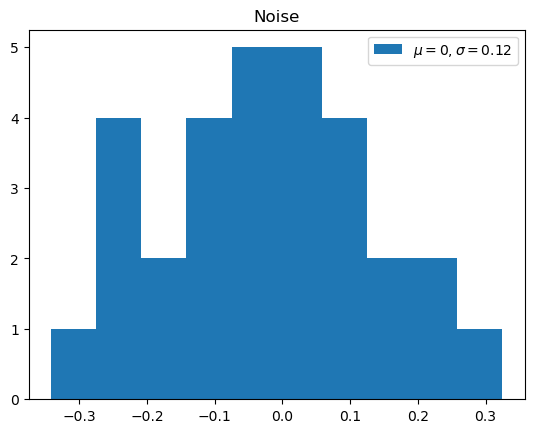

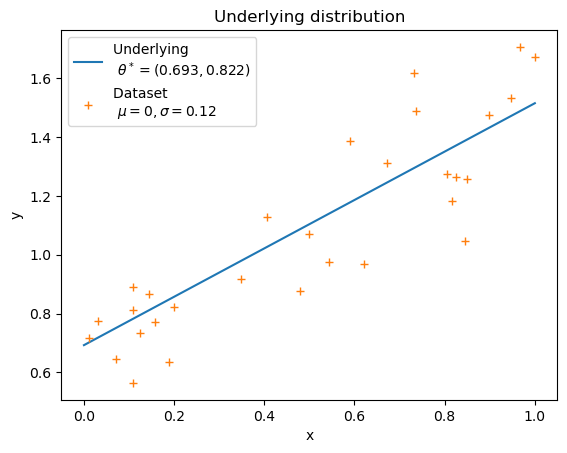

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Defining variables of this run
rng = np.random.default_rng()
theta_star = rng.random(2)  # True underlying distribution
# Noise parameters
mu = 0
sigma = 0.12


# Fuction describing underlying distribution
def f(x):
    x = np.vstack((np.ones(np.size(x)), x))    # Remembering to append column of ones to the input vector
    return np.dot(theta_star.T, x)


# Create noise function
def noise(_size):
    return rng.normal(mu, sigma, _size)

# Create dataset from underlying distribution and noise
n = 30
def create_dataset():
    x = np.sort(rng.uniform(0, 1, n))
    y = f(x)

    nse = noise(n)
    # Plot noise
    plt.figure()
    count, bins, _ = plt.hist(nse, 10, density=False, label="$ \mu = {}, \sigma = {} $".format(mu, sigma))
    plt.title("Noise")
    plt.legend()
    plt.show()

    y = y + nse
    return np.array([x, y]).TDataset 
dataset = create_dataset()   


# Plot dataset and true underlying distriubtion
def plot_data():
    x_dist = np.linspace(0, 1, 20)
    y_dist = f(x_dist)

    plt.figure()
    plt.plot(x_dist, y_dist, '-', label="Underlying \n $ \\theta^* = ({:.3f}, {:.3f})$".format(theta_star[0], theta_star[1]))
    plt.plot(dataset[:,0], dataset[:,1], '+', label="Dataset \n $ \mu = {}, \sigma = {} $".format(mu, sigma))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Underlying distribution")
    plt.legend()
    plt.show()

    

plot_data()